#### Notes

NLP: Natural Language Processing

Document: a collection of paragraphs, sentences, and words.
In a database, a document will be called a record

Corpus [Corpora]: a collection of similar documents
In a database, this is a table

Natural Language Toolkit (NLTK):
- Text processing and analytics capabilities
- ML support

NLTK Corpus Reader

Text Tokenization: process of breaking a stream of textual content into words, terms, symbols

Cleansing Text:
- make sure same format and standardized
- remove punctuation marks
- remove abbreviations
- case conversion
- remove hashtags, urls

Stop-Word Removal:
- stop words are a group of words that carry no meaning by themselves
- not required for analysis

Stemming: 
- a stem is the base part of a word
- like combi is the stem for combine, combined, combining
- the intention is to reduce the total words in the corpus

Lemmatization: produces a proper root word that belongs to the language

Parts of Speech (POS) Tagging

N-grams: sequence of n items in a sample text

##### Natural Language Processing
- Document and Corpus
- Read Text
- Analyze the text
- Tokenization
- Cleaning Text (Remove punctuation marks, Convert to lowercase, Remove stopwords)
- Stemming
- Lemmatization
- N-Grams
- Part of Speech Tagging
- Build the TF-ID Matrix(Give you num score of words giving you to importance of the word to the entire corpus)
- Word Cloud
- Sentiment Analysis
- Clustering
- Find optimal cluster size
- Classification
- Build an ML Model
- Run Predictions
- Predictive Text
- Build a ngram DB
- Recommend the next word

#### Start

In [1]:
# import libraries 
import os
import nltk
#nltk.download ('punkt')
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file using standard python libraries
with open (os.getcwd() + '/Course.txt', 'r') as fh:
    filedata = fh.read()

# print the first 200 characters in the file
print('Data from file:', filedata[:200])

Data from file: In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies


In [3]:
# read text using the Corpus Reader
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

# read the file into a corpus
corpus = PlaintextCorpusReader (os.getcwd(), 'Course.txt')

# print the content of the corpus
print(corpus.raw())

In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies. In this course, discover how to build big data pipelines around Apache Spark. Join your instructor as he takes you through how to make Apache Spark work with other big data technologies. He covers the basics of Apache Kafka Connect and how to integrate it with Spark for real-time streaming. In addition, he demonstrates how to use the various technologies to construct an end-to-end project that solves a real-world business problem.



In [4]:
# extract the file ids
print ('Files in the corpus: ', corpus.fileids())

# extract the paragraphs from this corpus
paragraphs = corpus.paras()

Files in the corpus:  ['Course.txt']


In [5]:
#tf-idf: a statistical measure that evaluates how relevant a word is to a document in a collection of documents

# Doc:1: This is a sampling of good words.
# Doc2: He said again and again the same word after word.
# Doc3: Words can really hurt.

# Clean the Documents:
# Doc1: sample good word
# Doc2: again again same word word
# Doc3: word real hurt

In [6]:
# extract the sentences from the corpus
sentences = corpus.sents()
print('# of sentences: ', len(sentences))
print('First sentence: ', sentences[0])

# extract words
words = corpus.words()
print('# of words: ', len(words))
print('All words: ', words[0:])

# of sentences:  5
First sentence:  ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', ',', 'process', ',', 'and', 'store', 'data', ',', 'data', 'engineers', 'and', 'data', '-', 'science', 'DevOps', 'specialists', 'must', 'understand', 'how', 'to', 'combine', 'multiple', 'big', 'data', 'technologies', '.']
# of words:  120
All words:  ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', ',', 'process', ',', 'and', 'store', 'data', ',', 'data', 'engineers', 'and', 'data', '-', 'science', 'DevOps', 'specialists', 'must', 'understand', 'how', 'to', 'combine', 'multiple', 'big', 'data', 'technologies', '.', 'In', 'this', 'course', ',', 'discover', 'how', 'to', 'build', 'big', 'data', 'pipelines', 'around', 'Apache', 'Spark', '.', 'Join', 'your', 'instructor', 'as', 'he', 'takes', 'you', 'through', 'how', 'to', 'make', 'Apache', 'Spark', 'work', 'with', 'other', 'big', 'data', 'technologies', '.', 'He', 'cover

#### Analyze the Corpus

In [11]:
# find the frequency distribution of the words
course_freq = nltk.FreqDist (corpus.words())

# print the most commonly used words
print ('Top 10 words: ', course_freq.most_common(10))

# find the distribution for a specific word
print ('Distribution for Spark: ', course_freq.get('Spark'))

Top 10 words:  [('to', 8), ('data', 7), (',', 5), ('-', 5), ('how', 5), ('.', 5), ('and', 4), ('In', 3), ('big', 3), ('technologies', 3)]
Distribution for Spark:  3


#### Tokenization

In [7]:
# read the file into tokens
base_file = open (os.getcwd() + '/Course.txt', 'rt')
raw_text = base_file.read()
base_file.close()

In [8]:
# extract tokens
token_list = nltk.word_tokenize (raw_text)
print ('Token list: ', token_list[:20])
print('Total tokens: ', len(token_list))

Token list:  ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', ',', 'process', ',', 'and', 'store', 'data', ',', 'data', 'engineers', 'and']
Total tokens:  110


#### Cleaning Text

In [12]:
# # use the punkt library to extract tokens
token_list2 = list (filter (lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print ('Token List after removing punctuation: ', token_list2[:20])
print ('Total tokens after punctuation removed: ', len(token_list2))

Token List after removing punctuation:  ['In', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', 'process', 'and', 'store', 'data', 'data', 'engineers', 'and', 'data-science', 'DevOps', 'specialists']
Total tokens after punctuation removed:  100


In [13]:
# convert to lower case
token_list3 = [word.lower() for word in token_list2]
print ('Token List after case conversion: ', token_list3[:20])
print ('Total tokens after case conversion: ', len(token_list3))

Token List after case conversion:  ['in', 'order', 'to', 'construct', 'data', 'pipelines', 'and', 'networks', 'that', 'stream', 'process', 'and', 'store', 'data', 'data', 'engineers', 'and', 'data-science', 'devops', 'specialists']
Total tokens after case conversion:  100


#### Remove Stopwords

In [14]:
# download standard stopwordlist
#nltk.download ('stopwords')
from nltk.corpus import stopwords

In [15]:
# remove the stopwords
token_list4 = list (filter (lambda token: token not in stopwords.words('english'), token_list3))
print ('Token List after removing stopwords: ', token_list4[:20])
print ('Total tokens after removing stopwords: ', len(token_list4))

Token List after removing stopwords:  ['order', 'construct', 'data', 'pipelines', 'networks', 'stream', 'process', 'store', 'data', 'data', 'engineers', 'data-science', 'devops', 'specialists', 'must', 'understand', 'combine', 'multiple', 'big', 'data']
Total tokens after removing stopwords:  61


#### Steamming

In [16]:
# use the PorterStemmer library for stemming
from nltk.stem import PorterStemmer

In [17]:
stemmer = PorterStemmer ()
# now stem the data
token_list5 = [stemmer.stem(word) for word in token_list4]
print ('Token list after stemming:', token_list5)
print ('Total tokens after stemming: ', len(token_list5))

Token list after stemming: ['order', 'construct', 'data', 'pipelin', 'network', 'stream', 'process', 'store', 'data', 'data', 'engin', 'data-sci', 'devop', 'specialist', 'must', 'understand', 'combin', 'multipl', 'big', 'data', 'technolog', 'cours', 'discov', 'build', 'big', 'data', 'pipelin', 'around', 'apach', 'spark', 'join', 'instructor', 'take', 'make', 'apach', 'spark', 'work', 'big', 'data', 'technolog', 'cover', 'basic', 'apach', 'kafka', 'connect', 'integr', 'spark', 'real-tim', 'stream', 'addit', 'demonstr', 'use', 'variou', 'technolog', 'construct', 'end-to-end', 'project', 'solv', 'real-world', 'busi', 'problem']
Total tokens after stemming:  61


#### Lemmatization

In [18]:
# use the wordnet library to map words to their lemmatized form
#nltk.download ('wordnet')
from nltk.stem import WordNetLemmatizer

In [19]:
lemmatizer = WordNetLemmatizer ()
# note we are using token_list4 to make a lemmatized list
token_list6 = [lemmatizer.lemmatize(word) for word in token_list4]
print ('Token list after lemmatization:', token_list6)
print ('Total tokens after lemmatization: ', len(token_list6))

Token list after lemmatization: ['order', 'construct', 'data', 'pipeline', 'network', 'stream', 'process', 'store', 'data', 'data', 'engineer', 'data-science', 'devops', 'specialist', 'must', 'understand', 'combine', 'multiple', 'big', 'data', 'technology', 'course', 'discover', 'build', 'big', 'data', 'pipeline', 'around', 'apache', 'spark', 'join', 'instructor', 'take', 'make', 'apache', 'spark', 'work', 'big', 'data', 'technology', 'cover', 'basic', 'apache', 'kafka', 'connect', 'integrate', 'spark', 'real-time', 'streaming', 'addition', 'demonstrates', 'use', 'various', 'technology', 'construct', 'end-to-end', 'project', 'solves', 'real-world', 'business', 'problem']
Total tokens after lemmatization:  61


#### N-Grams

In [20]:
from nltk.util import ngrams
from collections import Counter

In [21]:
# find bigrams and print the most common 5
bigrams = ngrams (token_list6 , 2)
print('Most common bigrams: ')
print(Counter(bigrams).most_common(5))

Most common bigrams: 
[(('big', 'data'), 3), (('data', 'pipeline'), 2), (('data', 'technology'), 2), (('apache', 'spark'), 2), (('order', 'construct'), 1)]


In [22]:
# find bigrams and print the most common 5
trigrams = ngrams (token_list6 , 3)
print('Most common trigrams: ')
print(Counter(trigrams).most_common(5))

Most common trigrams: 
[(('big', 'data', 'technology'), 2), (('order', 'construct', 'data'), 1), (('construct', 'data', 'pipeline'), 1), (('data', 'pipeline', 'network'), 1), (('pipeline', 'network', 'stream'), 1)]


#### Parts of Speech Training

In [24]:
# download the tagger package
#nltk.download ('averaged_perceptron_tagger')

# tag and print the first 10 tokens
nltk.pos_tag (token_list4)[:10]

[('order', 'NN'),
 ('construct', 'NN'),
 ('data', 'NNS'),
 ('pipelines', 'NNS'),
 ('networks', 'NNS'),
 ('stream', 'VBP'),
 ('process', 'NN'),
 ('store', 'NN'),
 ('data', 'NNS'),
 ('data', 'NNS')]

#### Word Cloud

In [25]:
# read the course descriptions
with open ('Course.txt', 'r') as fh:
    filedata = fh.read()

# check the contents
print('File contents:', filedata[0:200])

File contents: In order to construct data pipelines and networks that stream, process, and store data, data engineers and data-science DevOps specialists must understand how to combine multiple big data technologies


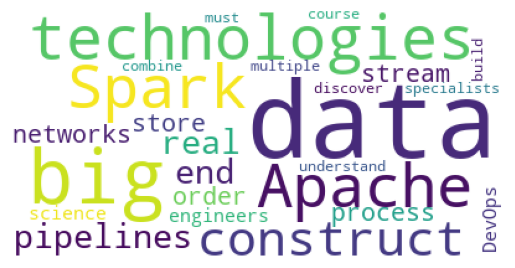

In [26]:
# create a stopword list
from wordcloud import WordCloud, STOPWORDS

stopwords = set (STOPWORDS)

#generate the word cloud data
wordcloud = WordCloud(stopwords = stopwords, max_words = 25, \
                        background_color = 'white').generate(filedata)
# display the word cloud
plt.imshow (wordcloud)
plt.axis ('off')
plt.show()

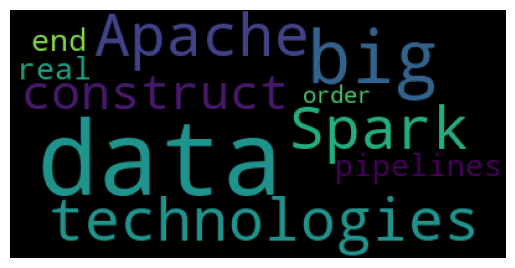

In [27]:
# enhance the word cloud
stopwords.update ('many', 'using', 'want', 'value')

# redo the word cloud
wordcloud = WordCloud(stopwords = stopwords, max_words = 10, \
                        background_color = 'black').generate(filedata)
plt.imshow (wordcloud)
plt.axis ('off')
plt.show()

#### Sentiment Analysis

In [28]:
# Text Preprocessing
with open ('Movie-Reviews.txt', 'r') as fh:
    reviews = fh.readlines()

print(reviews[:2])

['When your main character in a superhero movie is unwatchable, you already have a problem. In addition, Captain Marvel has no weaknesses, which kills the tension immediately.\n', 'Her performance was forced, uninspiring and flat! Not looking forward to the next movie with "her" in it....\n']


In [29]:
from textblob import TextBlob

In [30]:
print ('{:40} : {:10} : {:10}'.format('Review','Polarity', 'Subjectivity'))

for review in reviews:
    sentiment = TextBlob (review)
    print ('{:40} : {:01.2f}   : {:01.2f}'.format(review[:40], \
            sentiment.polarity, sentiment.subjectivity))

Review                                   : Polarity   : Subjectivity
When your main character in a superhero  : 0.17   : 0.33
Her performance was forced, uninspiring  : -0.11   : 0.11
I couldn't believe how boring this movie : -0.51   : 0.72
Nothing beats a good marvel movie, and t : 0.70   : 0.60
This movie did for Marvel what Wonder Wo : 0.60   : 0.68
Captain Marvel just became my favorite s : 0.40   : 0.64
This is a very controversial Marvel film : 0.36   : 0.62
Unfortunately, despite carrying many ele : -0.14   : 0.48
It's worth watching just for the fact th : 0.30   : 0.10
It's great for a first time viewing. Wou : 0.38   : 0.51


#### Visualizing the Sentiment Analysis

Final summarized counts:  [2, 6, 2]


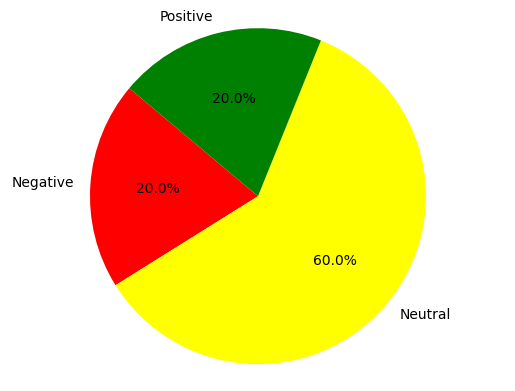

In [31]:
# categorize polarity into positive, neutral, or negative
labels = ['Negative', 'Neutral', 'Positive']

# initialize a count array
values = [0, 0, 0]

# categorize each review
for review in reviews:
    sentiment = TextBlob (review)

    # custom formula to convert polarity into numbers 0, 1, 2
    # Negative: 0, Neutral: 1, Positive: 2
    polarity = round ((sentiment.polarity + 1) * 3) % 3

    # add to the count
    values[polarity] += 1

print ('Final summarized counts: ', values)

colors = ['Red', 'Yellow', 'Green']

#plot a pie chart
plt.pie (values,
        labels = labels,
        colors = colors,
         # ??
        autopct = '%1.1f%%', 
         startangle = 140)
plt.axis ('equal')
plt.show()

#### Clustering

In [32]:
# load course hashtags
hashtags = pd.read_csv ('Course-Hashtags.csv')
print ('Sample Hashtag Data: ')
print (hashtags[:2])

Sample Hashtag Data: 
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming


In [33]:
# separate hashtags and titles into list
hash_list = hashtags['HashTags'].tolist()
title_list = hashtags['Course'].tolist()
print(hash_list)
print(title_list)

['BigData,DataScience,MachineLearning', 'Java,Advanced,Programming', 'Python,Automation,Scripting', 'Python,Graphics,Scripting', 'DataScience,MachineLearning,Intermediate', 'Java,JDBC,Programming', 'R,Programming,MachineLearning', 'Python,Design,Patterns', 'Hadoop,DataScience,BigData', 'Java,Programming,IDE', 'DataScience,GCP,Intermediate', 'Scala,DataScience,BigData', 'Java,Kubernetes,Programming', 'Python,Scripting,Developer']
['Apache Spark Essential Training', 'Java Memory Management', 'Python Automation and Testing', 'Python for Graphics', 'Machine Learning and AI Foundations', 'Java : Database Integration and JDBC', 'R Programming', 'Python Design Patterns', 'Hadoop for Data Science', 'Java IDE Overview', 'Data Science on Google Cloud Platform', 'Scala for Data Science', 'Kubernetes for Java Developers', 'Python Scripting']


In [35]:
# TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (stop_words = 'english')
hash_matrix = vectorizer.fit_transform (hash_list)
print ('Feature Names Identified: ')
print (vectorizer.get_feature_names_out())

Feature Names Identified: 
['advanced' 'automation' 'bigdata' 'datascience' 'design' 'developer'
 'gcp' 'graphics' 'hadoop' 'ide' 'intermediate' 'java' 'jdbc' 'kubernetes'
 'machinelearning' 'patterns' 'programming' 'python' 'scala' 'scripting']


In [36]:
# use kmeans clustering from scikit learn
from sklearn.cluster import KMeans

# split the data into three clusters
kmeans = KMeans (n_clusters = 3).fit(hash_matrix)

# get cluster labels
clusters = kmeans.labels_

#print cluster label and course under each cluster
for group in set (clusters):
    print('\Group: ', group)
    for i in hashtags.index:
        if (clusters[i] == group):
            print (title_list[i])

/Users/raul/miniconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


\Group:  0
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science
\Group:  1
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers
\Group:  2
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


/Users/raul/miniconda3/envs/cs329e/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of swuared distances:  [11.433022387031059, 9.055813116540266, 6.761066172191217, 5.8254594206230905, 4.688883377604405, 4.226544769235434, 3.5815033952191735, 2.8186260066230617, 2.289111342035165, 2.0217325681646887, 1.3264482360674248, 0.882973365858511, 0.40164181287464107, 2.220446049250313e-16]


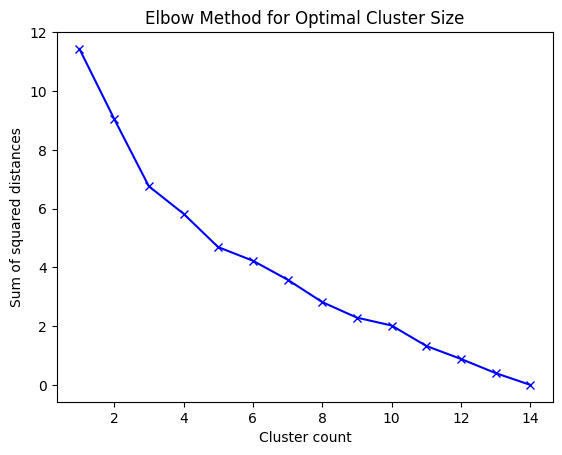

In [38]:
# find optimal cluster size by finding sum of squared distances
sosd = []

# run clustering for different sizes
K = range (1, 15)

for k in K:
    km = KMeans (n_clusters = k)
    km = km.fit (hash_matrix)
    sosd.append (km.inertia_)

print ('Sum of squared distances: ', sosd)
# plot sosd against number of clusters
plt.plot (K, sosd, 'bx-')
plt.xlabel ('Cluster count')
plt.ylabel ('Sum of squared distances')
plt.title ('Elbow Method for Optimal Cluster Size')
plt.show()

#### Classification

In [38]:
# read course descriptions
with open ('Course-Descriptions.txt', 'r') as fh:
    descriptions = fh.read().splitlines()
print ('Sample course descriptions: ', descriptions[:2])

# set stopwords
#nltk.download ('stopwords')
from nltk.corpus import stopwords

# set wordnet for lemmatization
#nltk.download ('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer ()

from sklearn.feature_extraction.text import TfidfVectorizer

# custom tokenizer
def customtokenize (str):
    tokens = nltk.word_tokenize (str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

# generate TFIDF matrix
vectorizer = TfidfVectorizer (tokenizer = customtokenize)
tfidf = vectorizer.fit_transform (descriptions)

print ('Sample feature names identified: ', vectorizer.get_feature_names_out()[:25])
print ('Size of TFIDF matrix: ', tfidf.shape)

Sample course descriptions:  ['In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. ', 'PHP is the most popular server-side language used to build dynamic websites, and though it is not especially difficult to use, nonprogrammers often find it intimidating. ']
Sample feature names identified:  ["'ll" "'re" "'s" '(' ')' ',' '.' '?' 'actively' 'adopting' 'amazon'
 'analysis' 'analytics' 'application' 'applied' 'architect' 'architecture'
 'around' 'aspect' 'associate' 'aws' 'basic' 'become' 'begin' 'big']
Size of TFIDF matrix:  (20, 238)


#### Build the Model

In [39]:
# load the pre-build classifications for training
with open ('Course-Classification.txt', 'r') as fh:
    classifications = fh.read().splitlines()

# create labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit (classifications)
print ('Classes found: ', le.classes_)

# convert the classes into integers for use with ML
int_classes = le.transform (classifications)
print ('Classes converted to integers: ', int_classes)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split (tfidf, int_classes, random_state = 0)

# build the model
classifier = MultinomialNB().fit (xtrain, ytrain)

Classes found:  ['Cloud-Computing' 'Data-Science' 'Programming']
Classes converted to integers:  [1 2 2 0 1 2 1 2 0 1 1 2 2 0 2 0 0 0 2 2]


#### Running Predictions

In [40]:
from sklearn import metrics

print ('Testing with Test Data Set')

# predict on test data
predictions = classifier.predict (xtest)

# https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
print ('Confusion Matrix')
print (metrics.confusion_matrix (ytest, predictions))

print ('\n Prediction Accuracy: ', \
      metrics.accuracy_score (ytest, predictions))

# predict on entire corpus data
predictions = classifier.predict (tfidf)

print ('Confusion Matrix')
print (metrics.confusion_matrix (int_classes, predictions))
print ('\n Prediction Accuracy: ', \
      metrics.accuracy_score (int_classes, predictions))

Testing with Test Data Set
Confusion Matrix
[[1 0 0]
 [0 0 1]
 [1 0 2]]

 Prediction Accuracy:  0.6
Confusion Matrix
[[6 0 0]
 [0 4 1]
 [1 0 8]]

 Prediction Accuracy:  0.9


#### Predictive Text

In [41]:
# read course description file
base_file = open ('Course-Descriptions.txt', 'rt')
raw_text = base_file.read()
base_file.close()

token_list = nltk.word_tokenize (raw_text)

token_list2 = [word.replace("'","") for word in token_list]

token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

token_list4 = [word.lower() for word in token_list3]

print('Sample token list: ', token_list4 [:10])
print('Total Tokens: ', len(token_list4))

Sample token list:  ['in', 'this', 'practical', 'hands-on', 'course', 'learn', 'how', 'to', 'do', 'data']
Total Tokens:  576


#### Build the nGrams Database

In [42]:
from nltk.util import ngrams
# use a sqlite database to store ngrams information
import sqlite3
conn = sqlite3.connect(':memory:')
# table to store first word, second word and count of occurrence
conn.execute ('''DROP TABLE IF EXISTS NGRAMS''')
conn.execute ('''CREATE TABLE NGRAMS
    (FIRST TEXT NOT NULL,
     SECOND TEXT NOT NULL,
     COUNTS INT NOT NULL,
     CONSTRAINT PK_GRAMS PRIMARY KEY (FIRST, SECOND)
); ''')
# generate bigrams
bigrams = ngrams (token_list4, 2)
# store bigrams in DB
for i in bigrams:
    insert_str = "INSERT INTO NGRAMS (FIRST, SECOND, COUNTS) \
                    VALUES ('" + i[0] + "', '" + i[1] + "', 1) \
                    ON CONFLICT (FIRST, SECOND) DO UPDATE SET COUNTS = COUNTS + 1"
    conn.execute (insert_str)
# look at sample data from the table
cursor = conn.execute ('SELECT FIRST, SECOND, COUNTS from NGRAMS LIMIT 5') 
for gram_row in cursor:
    print ('FIRST = ', gram_row[0], ' SECOND = ', gram_row[1], ' COUNT = ', gram_row[2])

# function to query DB and find the next word
def recommend (str): 
    nextwords = []
    # find the next words and sort them by occurrence
    word_filter = conn.execute ("SELECT SECOND from NGRAMS WHERE FIRST = '" + str + "' ORDER BY COUNTS DESC")
    # build a list ordered in descending order of frequency
    for filt_row in word_filter: 
        nextwords.append (filt_row[0])
    
    return nextwords

# recommend next words for data and science
print ('Next word for data: ', recommend('data'))
print ('Next word for science: ', recommend('science'))

FIRST =  in  SECOND =  this  COUNT =  2
FIRST =  this  SECOND =  practical  COUNT =  1
FIRST =  practical  SECOND =  hands-on  COUNT =  1
FIRST =  hands-on  SECOND =  course  COUNT =  1
FIRST =  course  SECOND =  learn  COUNT =  1
Next word for data:  ['science', 'analysis', 'data', 'from', 'in', 'mining', 'munging', 'node.js', 'preparation', 'scientists', 'visualization', 'you']
Next word for science:  ['begins', 'requires', 'specialists', 'teams']
